<h1>Importing the libraries</h1>

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import log_loss, hinge_loss, f1_score, accuracy_score, confusion_matrix

<h1>Importing the dataset</h1>
<p> The dataset file should be located within the same directory as the notebook. </p>

In [100]:
df = pd.read_csv('./Website Phishing.csv')

print(len(df[df['Result'] == 1])," legitimate websites")
print(len(df[df['Result'] == 0])," suspicious websites")
print(len(df[df['Result'] == -1])," phishing websites")

df.info()

548  legitimate websites
103  suspicious websites
702  phishing websites
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


<h1> Visualizing the dataset </h1>
<p> Visualizing the data helps with the features selection process. Here, the dataset is visuallized using a heatmap and the columns' correlations are visuallized by using column charts. </p>

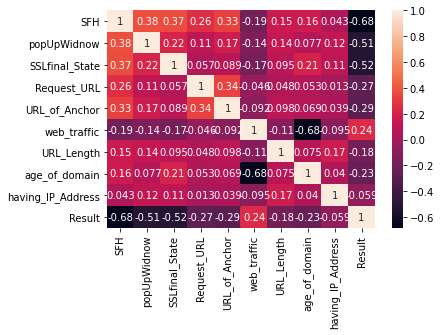

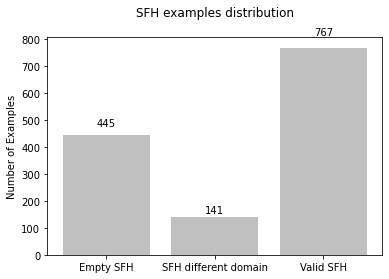

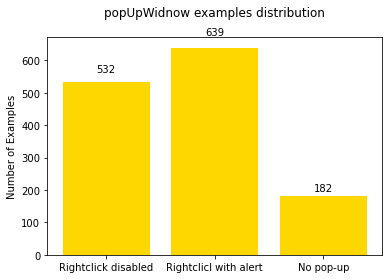

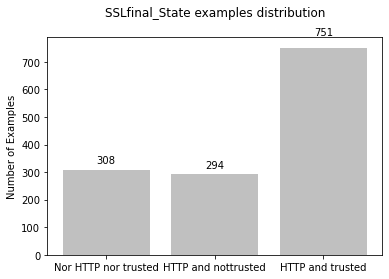

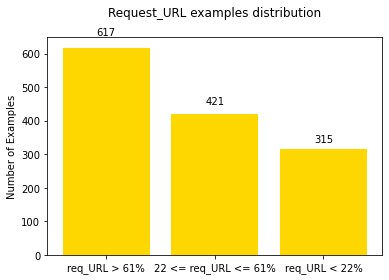

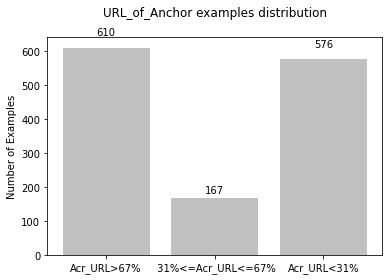

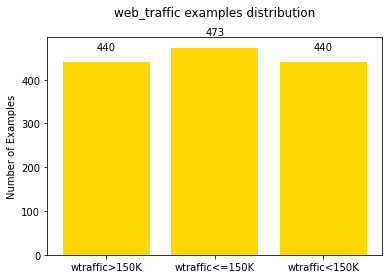

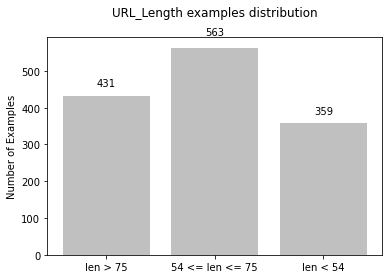

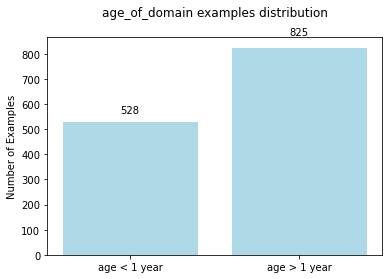

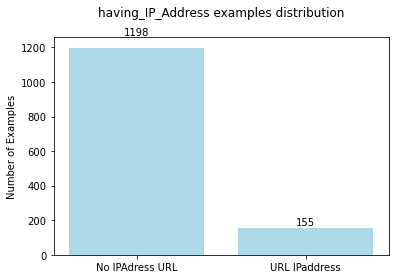

In [101]:
sns.heatmap(df.corr(),annot=True)

#THIS PART IS NOT MY CODE
#LINK TO THE CODE: https://www.kaggle.com/emilia11/analysisphishingdataset#Dataset-description

def plot_class_distribution(feature, color, data, labels):

  class_info = data[feature].value_counts().sort_index()
  
  #x = class_info.index
  x = labels
  x_pos = [i for i, _ in enumerate(x)]

  y = class_info.values


  fig, ax = plt.subplots()
  rects1 = ax.bar(x_pos, y, color=color)
  # helper function to show the number of examples in each bar
  def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.f' % float(height),
        ha='center', va='bottom')
  autolabel(rects1)


  plt.ylabel("Number of Examples")
  plt.title(feature + " examples distribution\n")
  plt.xticks(x_pos, x)

sfh_labels = ['Empty SFH', 'SFH different domain', 'Valid SFH']
plot_class_distribution('SFH', 'silver', df, sfh_labels)

pop_labels = ['Rightclick disabled', 'Rightclicl with alert', 'No pop-up']
plot_class_distribution('popUpWidnow', 'gold', df, pop_labels)

ssl_labels = ['Nor HTTP nor trusted', 'HTTP and nottrusted', 'HTTP and trusted']
plot_class_distribution('SSLfinal_State', 'silver', df, ssl_labels)

request_labels = ['req_URL > 61%',  '22 <= req_URL <= 61%', 'req_URL < 22%']
plot_class_distribution('Request_URL', 'gold', df, request_labels)

anchor_labels = [ 'Acr_URL>67%',' 31%<=Acr_URL<=67%', 'Acr_URL<31%']
plot_class_distribution('URL_of_Anchor', 'silver',df, anchor_labels)

web_labels = ['wtraffic>150K', 'wtraffic<=150K', 'wtraffic<150K']
plot_class_distribution('web_traffic', 'gold', df, web_labels)

url_labels = ['len > 75', '54 <= len <= 75', 'len < 54']
plot_class_distribution('URL_Length', 'silver', df, url_labels)

age_labels = ['age < 1 year', 'age > 1 year']
plot_class_distribution('age_of_domain', 'lightblue', df, age_labels)

ip_labels = ['No IPAdress URL','URL IPaddress']
plot_class_distribution('having_IP_Address', 'lightblue', df, ip_labels)

<h1> Data preparation </h1>
<p> The labels and the feature arrays are set. The data is then split into training and validation datasets. </p>

In [102]:
df = df.drop('web_traffic', axis=1) 
X = df.drop('Result', axis=1).to_numpy()
y = df['Result'].to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=43)
print("Training set has {} datapoints.".format(X_train.shape[0]))
print("Validation set has {} datapoints.".format(X_val.shape[0]))

Training set has 1082 datapoints.
Validation set has 271 datapoints.


<h1> Training and testing the model using OVR Logistic Regression </h1>
<p> The model are trained using the LogisticRegression model. The F1-score and the log loss for training and validation data are calculated. The confusion matrix of the model is also given. </p>

In [103]:
c = 10e5
clf = LogisticRegression(C=c, random_state=0, multi_class='ovr')
clf.fit(X_train, y_train)

y_pred_train_log = clf.predict_proba(X_train)
y_pred_train = clf.predict(X_train)
tr_error_log = log_loss(y_train, y_pred_train_log)

y_pred_val_log = clf.predict_proba(X_val)
y_pred_val = clf.predict(X_val)
val_acc = f1_score(y_val, y_pred_val, average='weighted')
val_error_log = log_loss(y_val, y_pred_val_log)

F1-score is  0.8384833610376842
Log loss of training is  0.44687202287182315
Log loss of validation is  0.3927489498652141


[Text(0, 0.5, '-1'), Text(0, 1.5, '0'), Text(0, 2.5, '1')]

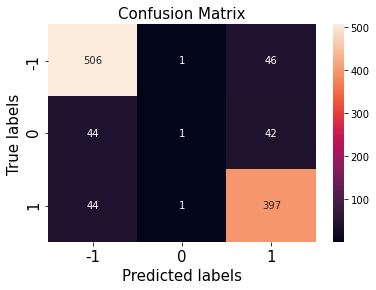

In [104]:
conf_matrix = confusion_matrix(y_train, y_pred_train)

print("F1-score is ", val_acc)
print("Log loss of training is ", tr_error_log)
print("Log loss of validation is ", val_error_log)

ax= plt.subplot()
sns.heatmap(conf_matrix,annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=15)
ax.xaxis.set_ticklabels(['-1', '0', '1'],fontsize=15)
ax.yaxis.set_ticklabels(['-1', '0', '1'],fontsize=15)

<h1> Training and testing the model using OVR Support Vector Classification (SVC) </h1>
<p> The model are trained using the SVC model and the OVR Classifier. The F1-score and the hinge loss for training and validation data are calculated. The confusion matrix of the model is also given. </p>

In [105]:
clf2 = SVC(kernel='linear', random_state=0, decision_function_shape='ovr')
clf2.fit(X_train, y_train)

y_pred_train = clf2.predict(X_train)
y_pred_train_svc = clf2.decision_function(X_train)
tr_error_svc = hinge_loss(y_train, y_pred_train_svc)

y_pred_val = clf2.predict(X_val)
y_pred_val_svc = clf2.decision_function(X_val)
val_acc = f1_score(y_val, y_pred_val, average='weighted')
val_error_svc = hinge_loss(y_val, y_pred_val_svc)

F1-score is  0.8427061634431472
Hinge loss of training is  0.3961064129927971
Hinge loss of validation is  0.33678766581315545


[Text(0, 0.5, '-1'), Text(0, 1.5, '0'), Text(0, 2.5, '1')]

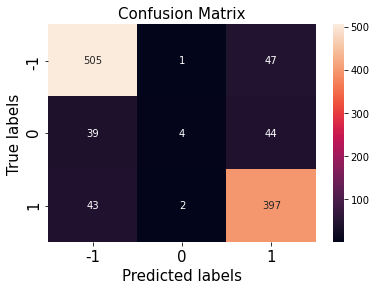

In [106]:
conf_matrix = confusion_matrix(y_train, y_pred_train)

print("F1-score is ", val_acc)
print("Hinge loss of training is ", tr_error_svc)
print("Hinge loss of validation is ", val_error_svc)

ax= plt.subplot()
sns.heatmap(conf_matrix,annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=15)
ax.xaxis.set_ticklabels(['-1', '0', '1'],fontsize=15)
ax.yaxis.set_ticklabels(['-1', '0', '1'],fontsize=15)

<h1> Testing the chosen model: OVR Support Vector Classification (SVC) </h1>
<p> The test set is formed. The Hinge loss and the F1-score is then calculated for this test set to finally evaluate the model. </p>

In [107]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state=43)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, train_size=0.5, random_state=43)
print("Training set has {} datapoints.".format(X_train.shape[0]))
print("Validation set has {} datapoints.".format(X_val.shape[0]))
print("Test set has {} datapoints.".format(X_test.shape[0]))

Training set has 1082 datapoints.
Validation set has 135 datapoints.
Test set has 136 datapoints.


In [108]:
clf2 = SVC(kernel='linear', random_state=0, decision_function_shape='ovr')
clf2.fit(X_train, y_train)

y_pred_train = clf2.predict(X_train)

y_pred_test = clf2.predict(X_test)
y_pred_test_svc = clf2.decision_function(X_test)
test_acc = f1_score(y_test, y_pred_test, average='weighted')
test_error_svc = hinge_loss(y_test, y_pred_test_svc)

print("F1-score is ", test_acc)
print("Hinge loss of test is ", test_error_svc)

F1-score is  0.839278007619501
Hinge loss of test is  0.34908163389363345
